# Parallel Coordinate Plot: Real Case Example -- Mean Climate

- Generate a static image of Parallel coordinate plot using Matplotlib, for mean climate metrics.
- Author: Jiwoo Lee (2021-07)
- Last update: 2021.08

## 1. Read data from JSON files

Input data for parallel coordinate plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Provide PMP output JSON files

In [1]:
import glob
import os
import numpy as np

In [2]:
mip = 'cmip6'
data_version = "v20201008"
json_dir = '/Users/lee1043/Documents/Research/PMP/mean_climate/json_files/'

In [3]:
json_list = sorted(glob.glob(os.path.join(json_dir, '*' + mip + '*' + data_version + '.json')))
for json_file in json_list:
    print(json_file.split('/')[-1])

pr.cmip6.historical.regrid2.2p5x2p5.v20201008.json
psl.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rlds.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rltcre.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rlus.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rlut.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rlutcs.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsds.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsdt.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rstcre.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsus.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsut.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsutcs.cmip6.historical.regrid2.2p5x2p5.v20201008.json
sfcWind.cmip6.historical.regrid2.2p5x2p5.v20201008.json
ta-200.cmip6.historical.regrid2.2p5x2p5.v20201008.json
ta-850.cmip6.historical.regrid2.2p5x2p5.v20201008.json
tas.cmip6.historical.regrid2.2p5x2p5.v20201008.json
ts.cmip6.historical.regrid2.2p5x2p5.v20201008.json
ua-200.cmip6.historical.regrid2.2p5x2

### 1.2 Define statistics and regions to extract from the above JSON files

In [4]:
stats = ['rms_xyt', 'rms_xy', 'rmsc_xy', 'bias_xy']
regions = ['global', 'TROPICS', 'NHEX', 'SHEX']

### 1.3 Extract data from JSON files

Use `read_mean_clim_json_files` function to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files
- `stats`: list of string, where each element is statistic to extract from the JSON
- `regions`: list of string, where each element is region to extract from the JSON
- `mip`: string, category for mip, e.g., 'cmip6'.  Optional
- `debug`: bool, default=False, enable few print statements to help debug

#### Returns
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files

In [5]:
from pcmdi_metrics.graphics import read_mean_clim_json_files

df_dict, var_list, var_unit_list = read_mean_clim_json_files(json_list, stats, regions, mip=mip)

In [6]:
print('var_list:', var_list)
print('var_unit_list:', var_unit_list)

var_list: ['pr', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rstcre', 'rsus', 'rsut', 'rsutcs', 'sfcWind', 'zg-500', 'ta-200', 'ta-850', 'tas', 'ts', 'ua-200', 'ua-850', 'uas', 'va-200', 'va-850', 'vas']
var_unit_list: ['pr [kg m-2 s-1]', 'psl [Pa]', 'rlds [W m-2]', 'rltcre [W m-2]', 'rlus [W m-2]', 'rlut [W m-2]', 'rlutcs [W m-2]', 'rsds [W m-2]', 'rsdt [W m-2]', 'rstcre [W m-2]', 'rsus [W m-2]', 'rsut [W m-2]', 'rsutcs [W m-2]', 'sfcWind [m s-1]', 'zg-500 [K]', 'ta-200 [K]', 'ta-850 [K]', 'tas [K]', 'ts [m s-1]', 'ua-200 [m s-1]', 'ua-850 [m s-1]', 'uas [m s-1]', 'va-200 [m s-1]', 'va-850 [m s-1]', 'vas [m]']


In [7]:
df_dict['rms_xyt']['ann']['global']

,mip,model,run,model_run,pr,psl,rlds,rltcre,rlus,rlut,...,ta-200,ta-850,tas,ts,ua-200,ua-850,uas,va-200,va-850,vas
0,cmip6,ACCESS-CM2,r1i1p1,ACCESS-CM2_r1i1p1,1.903,260.772,13.512,9.543,10.851,12.869,...,1.499,2.062,2.243,4.714,1.469,1.136,1.915,0.911,0.957,27.325
1,cmip6,ACCESS-ESM1-5,r1i1p1,ACCESS-ESM1-5_r1i1p1,1.892,258.906,10.951,8.180,10.440,12.053,...,1.360,1.904,2.051,4.254,1.577,1.146,1.986,0.946,0.943,36.598
2,cmip6,AWI-ESM-1-1-LR,r1i1p1,AWI-ESM-1-1-LR_r1i1p1,1.986,248.260,14.487,9.695,12.196,12.812,...,NaN,1.799,2.133,4.497,1.819,1.434,2.236,1.032,1.103,NaN
3,cmip6,BCC-CSM2-MR,r1i1p1,BCC-CSM2-MR_r1i1p1,1.828,313.653,13.632,8.171,11.375,11.139,...,NaN,2.449,2.208,NaN,NaN,1.332,NaN,NaN,1.077,NaN
4,cmip6,BCC-ESM1,r1i1p1,BCC-ESM1_r1i1p1,1.734,260.186,14.091,9.051,12.369,13.818,...,1.885,2.795,2.626,4.391,1.985,1.394,1.978,1.152,1.149,NaN
5,cmip6,CAMS-CSM1-0,r1i1p1,CAMS-CSM1-0_r1i1p1,1.834,211.601,17.980,8.328,13.180,11.989,...,NaN,2.508,2.804,NaN,NaN,1.965,NaN,NaN,1.497,NaN
6,cmip6,CESM2,r1i1p1,CESM2_r1i1p1,1.405,259.436,10.961,7.378,10.009,8.953,...,1.339,1.515,1.850,3.849,1.644,NaN,1.893,0.915,NaN,NaN
7,cmip6,CESM2-FV2,r1i1p1,CESM2-FV2_r1i1p1,1.549,264.917,12.592,8.409,10.703,10.240,...,1.888,1.823,2.100,4.036,2.135,NaN,2.063,1.025,NaN,NaN
8,cmip6,CESM2-WACCM,r1i1p1,CESM2-WACCM_r1i1p1,1.357,251.407,10.753,7.227,9.766,8.894,...,NaN,1.512,1.808,3.719,1.647,NaN,1.829,0.891,NaN,NaN
9,cmip6,CESM2-WACCM-FV2,r1i1p1,CESM2-WACCM-FV2_r1i1p1,1.688,248.929,12.136,8.664,10.744,10.923,...,1.805,1.775,2.100,3.994,2.099,NaN,2.067,1.039,NaN,NaN


In [8]:
data = df_dict['rms_xyt']['ann']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
metric_names = ['\n['.join(var_unit.split(' [')) for var_unit in var_unit_list]
model_highlights = ['E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA']
print('data.shape:', data.shape)
print('len(metric_names): ', len(metric_names))
print('len(model_names): ', len(model_names))

data.shape: (40, 25)
len(metric_names):  25
len(model_names):  40


## 2. Plot

In [9]:
from pcmdi_metrics.graphics import parallel_coordinate_plot

Parameters
----------
- `data`: 2-d numpy array for metrics
- `metric_names`: list, names of metrics for individual vertical axes (axis=1)
- `model_names`: list, name of models for markers/lines (axis=0)
- `model_highlights`: list, default=None, List of models to highlight as lines
- `fig`: `matplotlib.figure` instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `figsize`: tuple (two numbers), default=(15,5), image size
- `show_boxplot`: bool, default=True, show box and wiskers plot
- `show_violin`: bool, default=True, show violin plot
- `title`: string, default=None, plot title
- `identify_all_models`: bool, default=True. Show and identify all models using markers
- `xtick_labels`: list, default=None, list of strings that to use as metric names (optional)
- `xtick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `ytick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `colormap`: string, default='viridis', matplotlib colormap
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis

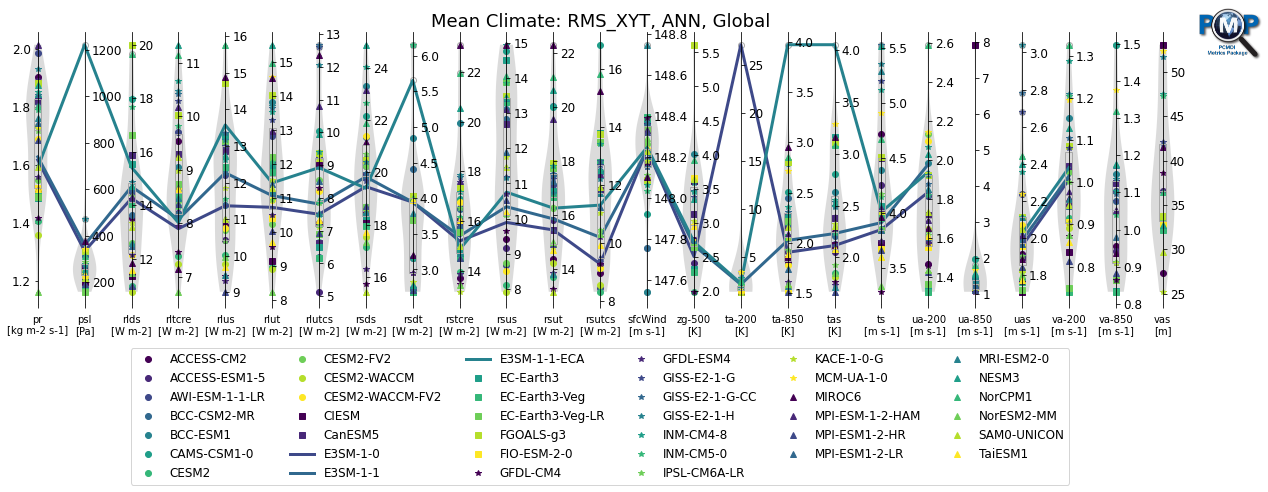

In [10]:
fig, ax = parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                                   title='Mean Climate: RMS_XYT, ANN, Global', 
                                   figsize=(21, 5),
                                   xtick_labelsize=10,
                                   logo_rect=[0.8, 0.8, 0.15, 0.15])

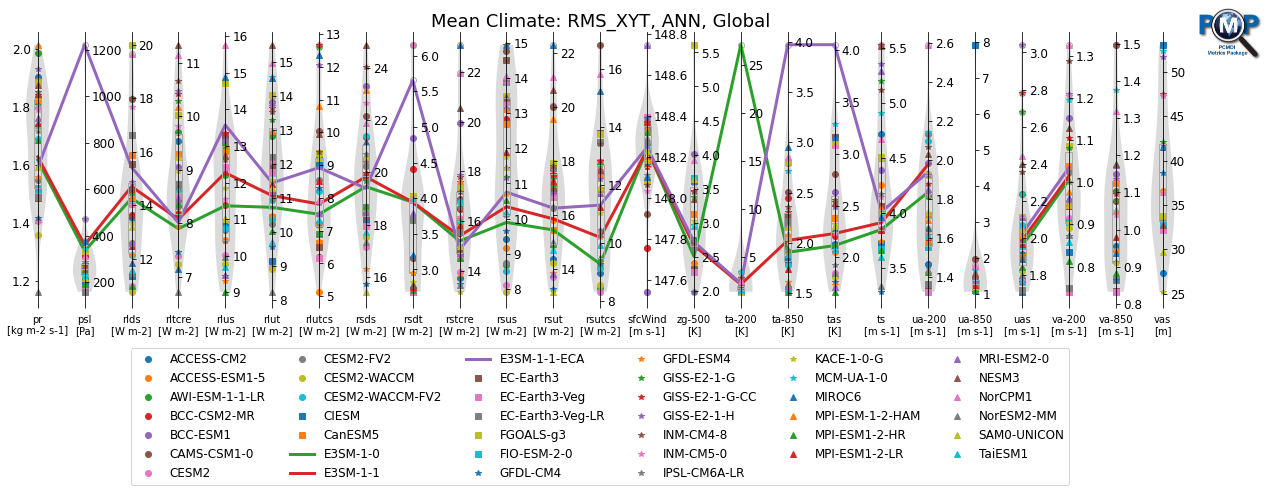

In [11]:
fig, ax = parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                                   title='Mean Climate: RMS_XYT, ANN, Global', 
                                   figsize=(21, 5), colormap='tab10',
                                   xtick_labelsize=10,
                                   logo_rect=[0.8, 0.8, 0.15, 0.15])

In [12]:
# Add Watermark
ax.text(0.5, 0.5, 'Example', transform=ax.transAxes,
        fontsize=100, color='black', alpha=0.6,
        ha='center', va='center', rotation='0')

# Save figure as an image file
fig.savefig('mean_clim_parallel_coordinate_plot_example.png')